In [182]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_excel('Findata.xlsx', engine = 'openpyxl', index_col = 'Start Period')


In [3]:
df.head()
df.columns

Index(['End Period', 'Ticker Code', 'Company Name',
       'Share Price Return % (QTR)', 'Market Cap', 'Daily Liquidity',
       'Short Interest', 'RSI', 'Past 3M Return', 'Past 6M Return',
       'Past 12M Return', 'Avg 3/6/12M Return', 'STA', 'SNOA', 'PROBM to PMAN',
       'PFD (X100)', 'Altman Z, LTM/FY', 'TBV', 'Net Debt/Total Common Equity',
       'Intangible Asset Ratio', 'ORECTA', 'EV/EBIT', 'EV/EBITDA', 'EV/S',
       'P/B', ' EV ', 'GP', 'EV/GP', 'P/S', 'GPTA', 'GPTA, -1', 'GPTA, -2',
       'GPTA, -3', 'GPTA Avg', 'GP/Capital', 'GP/Capital, -1',
       'GP/Capital, -2', 'GP/Capital, -3', 'GP/Capital Avg', 'GPM', 'GPM, -1',
       'GPM, -2', 'GPM, -3', 'GPM, -4', 'GPM, -5', 'GPM, -6', 'GPM, -7',
       'GPM, -8', 'Avg Margin Growth', 'Margin Stability', 'Avg Rev Growth',
       '(Rev Growth) Growth Slope', 'Rev Stability S.D', 'Avg GP Growth',
       '(GP Growth) Growth Slope', 'GP Stability S.D', 'Beta, 24',
       'Price Volatility, 3', 'Price Volatility, 6', 'SMA 50', 'SM

In [4]:
df.update(df['End Period'].dt.date)
for i in df.iloc[:, 4:].columns:
       df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [5]:
null_series = df.isnull().sum()

null_series[null_series != 0].index

Index(['STA', 'SNOA', 'PROBM to PMAN', 'Net Debt/Total Common Equity',
       'Intangible Asset Ratio', 'ORECTA', 'EV/EBIT', 'EV/EBITDA', 'EV/S',
       'P/B', 'EV/GP', 'P/S', 'GPTA', 'GPTA, -1', 'GPTA, -2', 'GPTA, -3',
       'GPTA Avg', 'GP/Capital', 'GP/Capital, -1', 'GP/Capital, -2',
       'GP/Capital, -3', 'GP/Capital Avg', 'GPM', 'GPM, -1', 'GPM, -2',
       'GPM, -3', 'GPM, -4', 'GPM, -5', 'GPM, -6', 'GPM, -7', 'GPM, -8',
       'Avg Margin Growth', 'Margin Stability', 'Avg Rev Growth',
       '(Rev Growth) Growth Slope', 'Rev Stability S.D', 'Avg GP Growth',
       '(GP Growth) Growth Slope', 'GP Stability S.D', 'Beta, 24',
       'Price Volatility, 3', 'Price Volatility, 6', 'SMA 50', 'SMA 100',
       'SMA 150', 'SMA 200', 'Avg 3 RSI', 'Avg 6 RSI', 'Avg 12 RSI',
       'Avg 3,6,12 RSI'],
      dtype='object')

In [6]:
df = df.sort_values(by = ['Company Name', 'Start Period'])

df[['STA', 'SNOA', 'PROBM to PMAN', 'Net Debt/Total Common Equity',
       'Intangible Asset Ratio', 'ORECTA', 'EV/EBIT', 'EV/EBITDA', 'EV/S',
       'P/B', 'EV/GP', 'P/S', 'Margin Stability', 'Avg Rev Growth',
       '(Rev Growth) Growth Slope', 'Rev Stability S.D', 'Avg GP Growth',
       '(GP Growth) Growth Slope', 'GP Stability S.D', 'Beta, 24',
       'Price Volatility, 3', 'Price Volatility, 6', 'SMA 50', 'SMA 100',
       'SMA 150', 'SMA 200']] = df[['STA', 'SNOA', 'PROBM to PMAN', 'Net Debt/Total Common Equity',
       'Intangible Asset Ratio', 'ORECTA', 'EV/EBIT', 'EV/EBITDA', 'EV/S',
       'P/B', 'EV/GP', 'P/S', 'Margin Stability', 'Avg Rev Growth',
       '(Rev Growth) Growth Slope', 'Rev Stability S.D', 'Avg GP Growth',
       '(GP Growth) Growth Slope', 'GP Stability S.D', 'Beta, 24',
       'Price Volatility, 3', 'Price Volatility, 6', 'SMA 50', 'SMA 100',
       'SMA 150', 'SMA 200']].interpolate(method = 'time')

df = df.reset_index()
df.update(df['Start Period'].dt.date)

In [7]:
def lag_filler(data):

       n_col = len(data.columns)
       pointer = len(data.columns)

       for k in data.columns:  
              null_series = data[data[k].isnull()].index
              n = len(null_series)

              pointer -= 1

              for j in range(n):
                     
                     x = null_series[j]

                     for i in range(1, pointer + 1):
                            if x != data.iloc[-1].name:
                                   y = data.iloc[x + i, data.columns.get_loc(k) + i]
                                   
                                   if (not np.isnan(y)) and np.isnan(data.loc[x, k]):
                                          for g in range(i):
                                                 data.iloc[x + g, data.columns.get_loc(data[k].name) + g] = y
                     if np.isnan(data.loc[x, k]):
                            y = data.iloc[x - 1, data.columns.get_loc(k) - 1]
                            if (not np.isnan(y)) and np.isnan(data.loc[x, k]):
                                   data.loc[x, k] = y
gpta = df.iloc[:, 30:34]
gp_capital = df.iloc[:, 35:39]
gpm = df.iloc[:, 40:49]

In [8]:
lag_filler(gpta)
lag_filler(gp_capital)
lag_filler(gpm)
print(gpta.isnull().sum(), gp_capital.isnull().sum(), gpm.isnull().sum())

GPTA        0
GPTA, -1    0
GPTA, -2    0
GPTA, -3    0
dtype: int64 GP/Capital        0
GP/Capital, -1    0
GP/Capital, -2    0
GP/Capital, -3    0
dtype: int64 GPM        0
GPM, -1    0
GPM, -2    0
GPM, -3    0
GPM, -4    0
GPM, -5    0
GPM, -6    0
GPM, -7    0
GPM, -8    0
dtype: int64


In [16]:
df.iloc[:, 30:34] = gpta
df.iloc[:, 35:39] = gp_capital
df.iloc[:, 40:49] = gpm

In [17]:
def percentage_change(cols):
    pchange = (cols.iloc[:, 0] - cols.iloc[:, 1])/cols.iloc[:, 1]
    return pchange

margin_growth = percentage_change(df.iloc[:, 40:42])
for i in range(7):
    margin_growth = pd.concat([margin_growth, percentage_change(df.iloc[:, 41+i:43+i])], axis = 1)

In [11]:
df['GPTA Avg'] = df['GPTA Avg'].fillna(np.mean(df[df.iloc[:,34].isnull()].iloc[:, 30:34], axis = 1))
df['GP/Capital Avg'] = df['GP/Capital Avg'].fillna(np.mean(df[df.iloc[:,39].isnull()].iloc[:, 35:39], axis = 1))
df['Avg Margin Growth'] = df['Avg Margin Growth'].fillna(np.mean(margin_growth, axis = 1))

In [12]:
df['Avg 3 RSI'] = df['Avg 3 RSI'].fillna(df.rolling(3).mean()['RSI'])
df['Avg 6 RSI'] = df['Avg 6 RSI'].fillna(df.rolling(6).mean()['RSI'])
df['Avg 12 RSI'] = df['Avg 12 RSI'].fillna(df.rolling(12).mean()['RSI'])
df['Avg 3,6,12 RSI'] = df['Avg 3,6,12 RSI'].fillna(df.loc[:, 'Avg 3 RSI':'Avg 12 RSI'].mean(axis = 1))

In [13]:
null_series = df.isnull().sum()

null_series[null_series != 0]

Series([], dtype: int64)

In [65]:
train = df[df['Start Period'] < datetime.date(2020, 12, 31)]
test = df[df['Start Period'] == datetime.date(2020, 12, 31)]

X_train, y_train = train.iloc[:, 5:].values, train.iloc[:, 4].values
X_test, y_test = test.iloc[:, 5:].values, test.iloc[:, 4].values

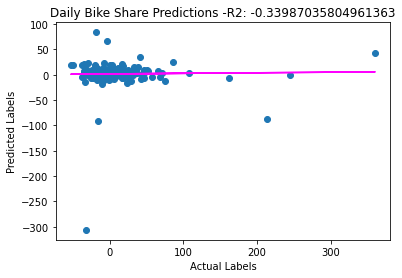

In [260]:
model = LinearRegression().fit(X_train, y_train)
predictions = model.predict(X_test)

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions ' + '-R2: {}'.format(r2_score(y_test, predictions)))

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# data appears to be heavily influenced by outliers

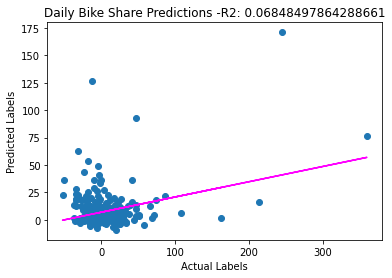

In [266]:
model = RandomForestRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions ' + '-R2: {}'.format(r2_score(y_test, predictions)))

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

#random forest definitely improved the model significantly but it's no where close to being sufficiently predictive

                    Importance
Feature                       
Price Volatility, 3   0.050888
Past 3M Return        0.035901
RSI                   0.033522
SMA 200               0.031521
Past 6M Return        0.029529


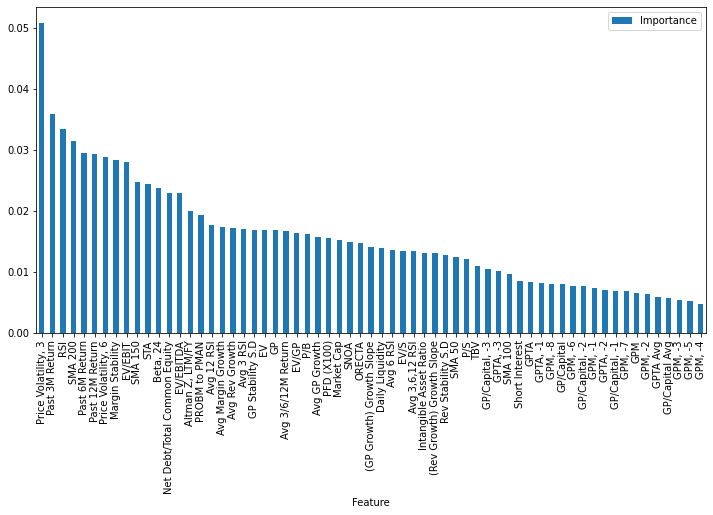

In [267]:
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
imp = model.feature_importances_
imp = np.append(df.iloc[:, 5:].columns.to_numpy().reshape(63,1), imp.reshape(63, 1), axis = 1)
imp = pd.DataFrame(imp, columns = ['Feature', 'Importance']).set_index('Feature').sort_values('Importance', ascending = False)
imp.plot(kind = 'bar', ax = ax)
print(imp.iloc[:5, :])

Learning rate set to 0.057078
0:	learn: 23.4766123	total: 14.6ms	remaining: 14.6s
1:	learn: 23.3659764	total: 37.9ms	remaining: 18.9s
2:	learn: 23.2779461	total: 51.8ms	remaining: 17.2s
3:	learn: 23.1766373	total: 65.8ms	remaining: 16.4s
4:	learn: 23.0873426	total: 80.6ms	remaining: 16s
5:	learn: 23.0348322	total: 93.2ms	remaining: 15.4s
6:	learn: 22.9876078	total: 104ms	remaining: 14.8s
7:	learn: 22.9102409	total: 115ms	remaining: 14.2s
8:	learn: 22.8391627	total: 124ms	remaining: 13.7s
9:	learn: 22.7727207	total: 135ms	remaining: 13.4s
10:	learn: 22.6857819	total: 148ms	remaining: 13.3s
11:	learn: 22.6121876	total: 157ms	remaining: 13s
12:	learn: 22.5303868	total: 167ms	remaining: 12.7s
13:	learn: 22.4551282	total: 175ms	remaining: 12.3s
14:	learn: 22.4040924	total: 183ms	remaining: 12s
15:	learn: 22.3471539	total: 191ms	remaining: 11.7s
16:	learn: 22.2844518	total: 202ms	remaining: 11.7s
17:	learn: 22.2417544	total: 210ms	remaining: 11.5s
18:	learn: 22.1674836	total: 220ms	remaining

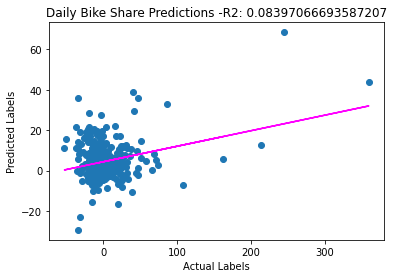

In [268]:
model = CatBoostRegressor().fit(X_train, y_train)

predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions ' + '-R2: {}'.format(r2_score(y_test, predictions)))

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

                    Importance
Feature                       
EV/EBIT               7.088372
Price Volatility, 3   6.860526
EV/EBITDA             5.122863
Price Volatility, 6   3.427303
Past 6M Return        3.410038


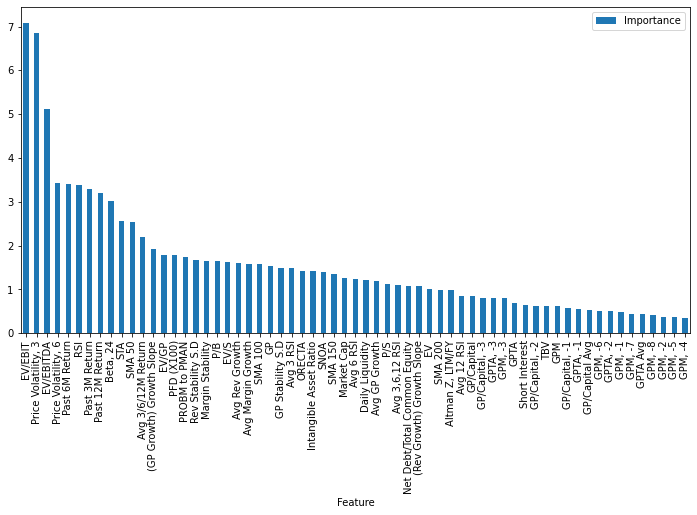

In [241]:
fig = plt.figure(figsize = (12, 6))
ax = fig.gca()
imp = model.feature_importances_
imp = np.append(df.iloc[:, 5:].columns.to_numpy().reshape(63,1), imp.reshape(63, 1), axis = 1)
imp = pd.DataFrame(imp, columns = ['Feature', 'Importance']).set_index('Feature').sort_values('Importance', ascending = False)
imp.plot(kind = 'bar', ax = ax)
print(imp.iloc[:5, :])

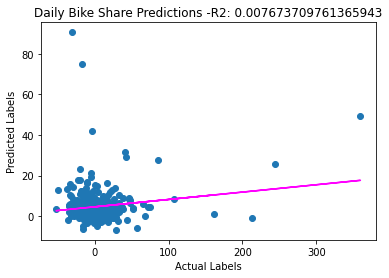

In [297]:
X_train_imp, X_test_imp = train[imp.iloc[:5, :].index].values, test[imp.iloc[:5, :].index].values

model = LinearRegression().fit(X_train_imp, y_train)
predictions = model.predict(X_test_imp)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions ' + '-R2: {}'.format(r2_score(y_test, predictions)))

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [296]:
# Using CatBoost predicted values

res = pd.DataFrame(np.append(np.append(X_test, predictions.reshape(326, 1), axis = 1), y_test.reshape(326, 1), axis = 1), columns = train.iloc[:, 5:].columns.to_list() + ['Predicted Return', 'Actual Return']).sort_values('Predicted Return', ascending = False)

top_5 = res.iloc[:5, :]

print('The predicted top 5 best performing countries are:', *test.iloc[top_5.index, :]['Company Name'].values)

The predicted top 5 best performing countries are: MicroVision, Inc. Marathon Digital Holdings, Inc. SYNNEX Corporation Materialise NV Ideanomics, Inc.
